# Data Visualization for the Car details dataset

## Importing the standard libraries and the dataset

In [241]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
dataset = pd.read_csv('./assets/car-details-for-visualization.csv')
dataset_encoded = pd.read_csv('./assets/car-details-for-visualization-encoded.csv')

Confirming the dataset is available and correct:

In [243]:
dataset.head()

,brand,year,km_driven,fuel,transmission,seller_type,owner,seats,mileage,engine,max_power,nm,selling_price
0,Maruti,2014,145500,Diesel,Manual,Individual,First Owner,5.0,23.40,1248,74.00,190.00,450000
1,Skoda,2014,120000,Diesel,Manual,Individual,Second Owner,5.0,21.14,1498,103.52,250.00,370000
2,Honda,2006,140000,Petrol,Manual,Individual,Third Owner,5.0,17.70,1497,78.00,124.54,158000
3,Hyundai,2010,127000,Diesel,Manual,Individual,First Owner,5.0,23.00,1396,90.00,219.67,225000
4,Maruti,2007,120000,Petrol,Manual,Individual,First Owner,5.0,16.10,1298,88.20,112.78,130000


### Visualizing the correlation between features

In [244]:
price_mean = dataset['selling_price'].mean()
price_median = dataset['selling_price'].median()

print('Mean:', price_mean)
print('Median:', price_median)

Mean: 580414.3782268579
Median: 450000.0


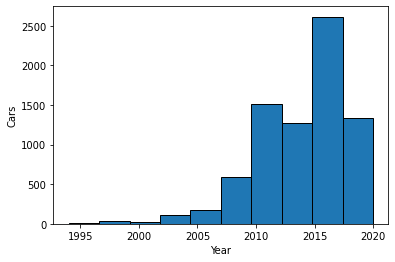

In [245]:
plt.hist(dataset["year"], edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Cars")
plt.show()

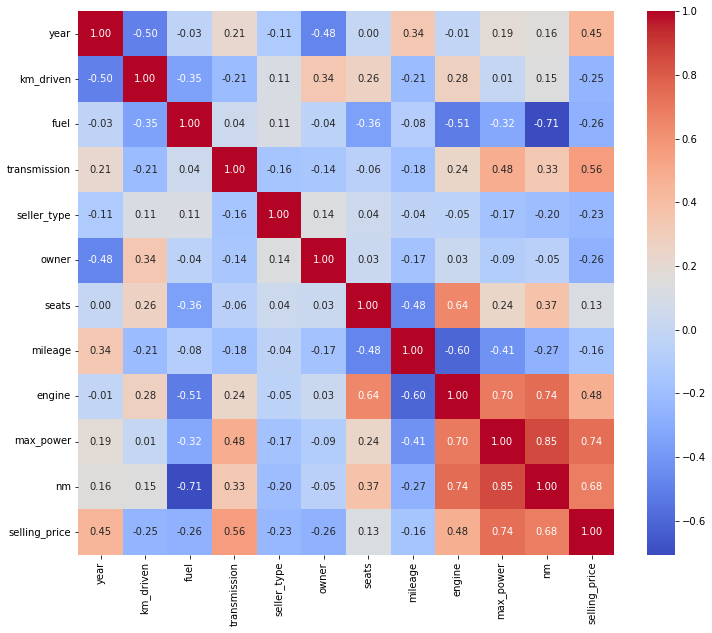

In [246]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataset_encoded.corr(), annot=True, fmt='.2f', cbar=True, cmap='coolwarm')
plt.show()

Seeing this plot helps visualize the relationship between the selling price and other features.

Not having done this, I would have believed a feature like km_driven and mileage would be a lot more correlated with the selling price.

The features that seem important for the selling price is year, transmission, engine, max_power and nm.

Looking at the big picture that also makes sense, because cars that produce more power are usually more expensive. However, the other features are not to be counted out yet.

## Visualization in relation of sales price

Most cars seem to be of newer sort

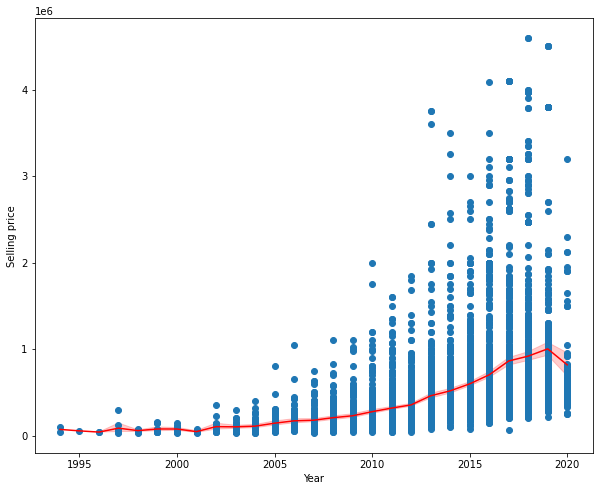

In [247]:
plt.figure(figsize=(10, 8))
plt.ylabel("Selling price")
plt.xlabel("Year")
sns.lineplot(x="year", y="selling_price", data=dataset, color='red')
plt.scatter(dataset['year'], dataset['selling_price'])
plt.show()


There seems to be a linear growth in the selling price the newer the car is, as expected up until 2019. For some reason it drops in 2020. (Could be pandemic related)

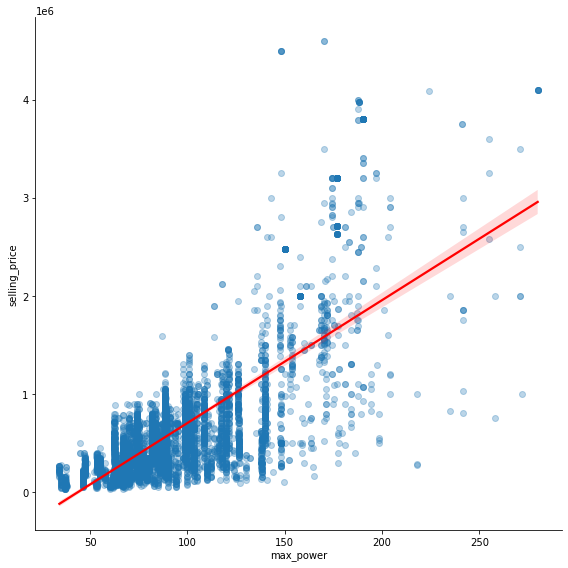

In [248]:
sns.lmplot(x="max_power", y="selling_price", data=dataset, scatter_kws={"alpha" : 0.3}, line_kws={"color" : "red"}, height=8)
plt.show()


The HP (max_power) to selling price ratio also seems to be a linear relationship. I won't do for nm and engine, since they will yield about the same result.

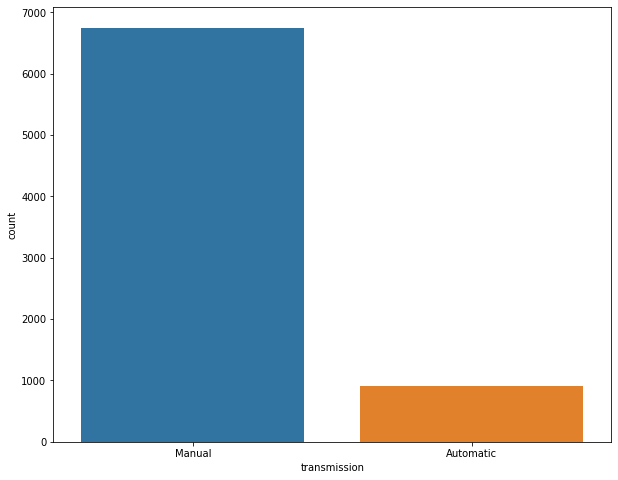

In [249]:
plt.figure(figsize=(10, 8))
sns.countplot(x="transmission", data=dataset)
plt.show()

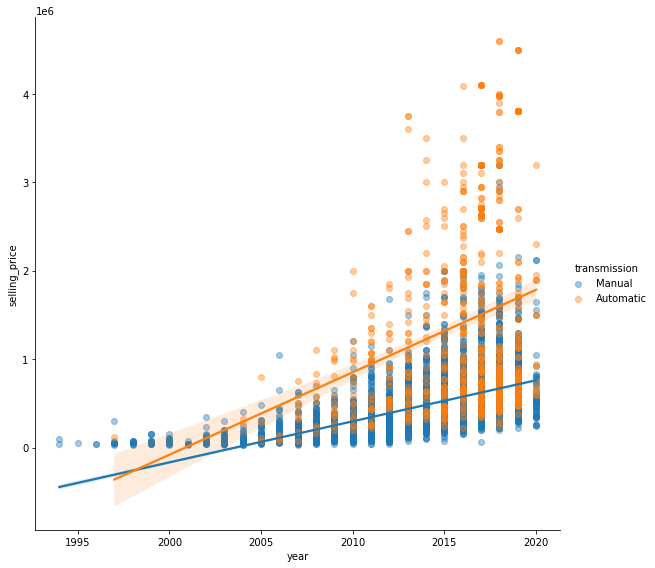

In [250]:
sns.lmplot(x="year", y="selling_price", data=dataset, hue="transmission", scatter_kws={"alpha" : 0.4}, height=8)
plt.show()

Automatic transmissions seem to be affect the sales price more than manual transmissions

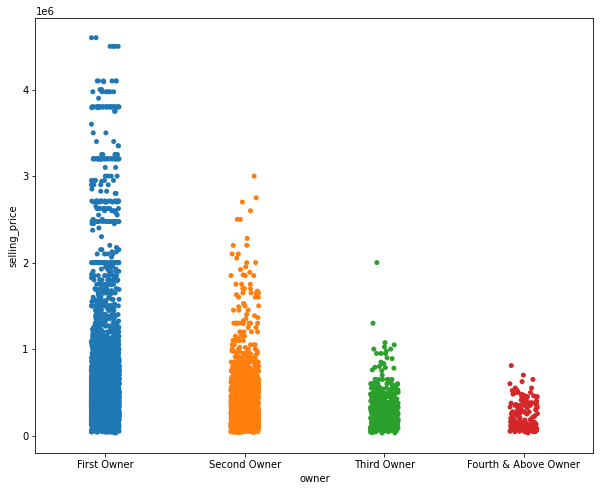

In [251]:
plt.figure(figsize=(10, 8))
sns.stripplot(y="selling_price", x="owner", data=dataset)
plt.show()

Cars that only have had 1 owner seem to be the most expensive. As soon as they are on to the 2nd owner they drastically drop in price then onwards.

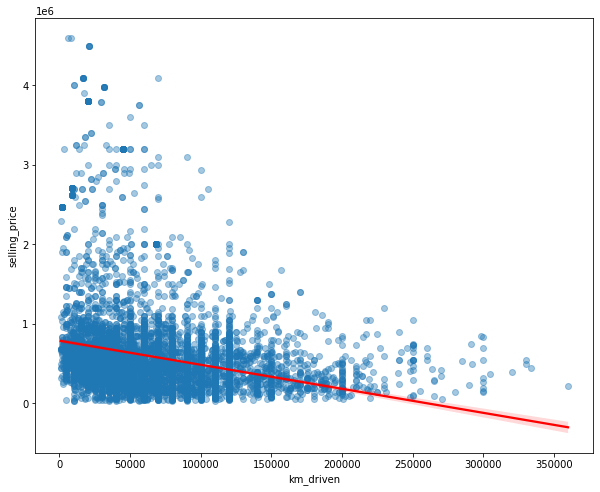

In [252]:
plt.figure(figsize=(10, 8))
sns.regplot(x="km_driven", y="selling_price", data=dataset, scatter_kws={"alpha" : 0.4}, line_kws={"color" : "red"})
plt.show()

Cars that have driven less are the most expensive as expected. The more they have driven the more they lose linearly in value.

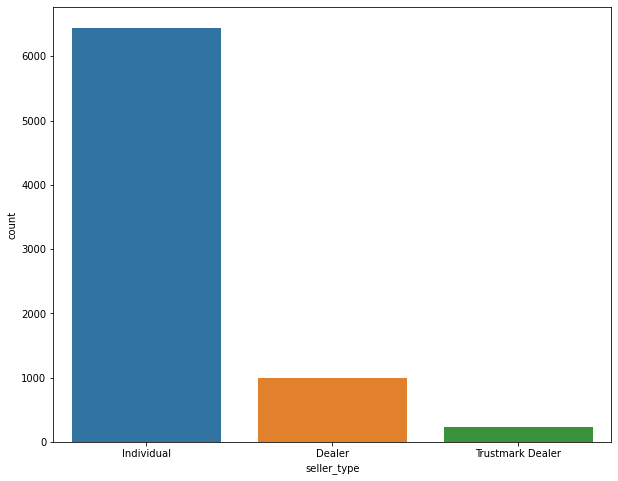

In [253]:
plt.figure(figsize=(10, 8))
sns.countplot(x="seller_type", data=dataset)
plt.show()

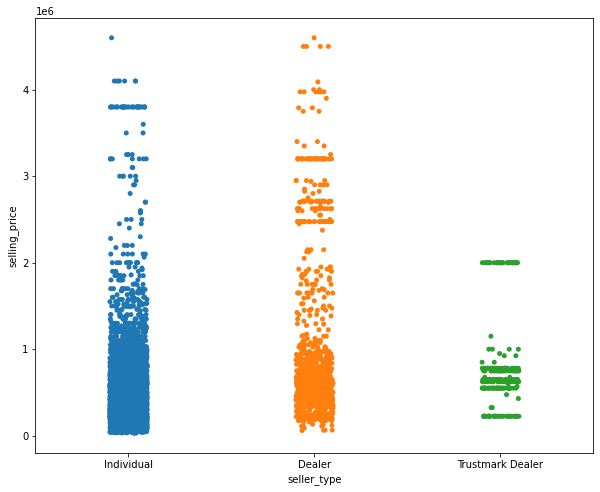

In [254]:
plt.figure(figsize=(10, 8))
sns.stripplot(y="selling_price", x="seller_type", data=dataset)
plt.show()

A lot of private sales in this dataset. However dealers seem to have more expensive sales. 

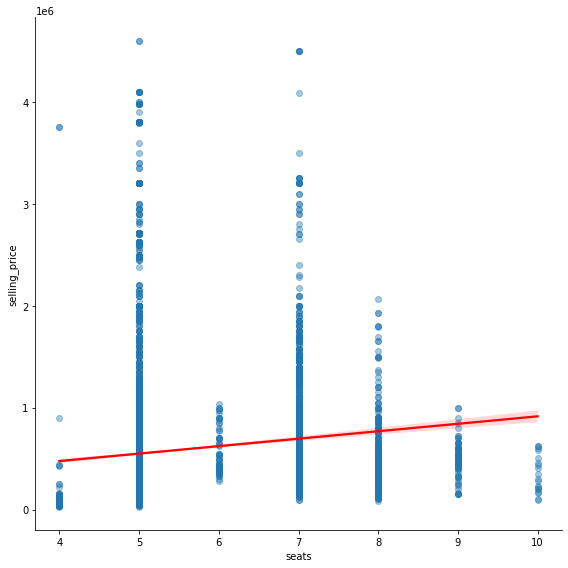

In [255]:
sns.lmplot(x="seats", y="selling_price", data=dataset, scatter_kws={"alpha" : 0.4}, height=8, line_kws={"color" : "red"})
plt.show()

The amount of seats in a car seems to have a small linear relationship with the selling price in a positive fashion.

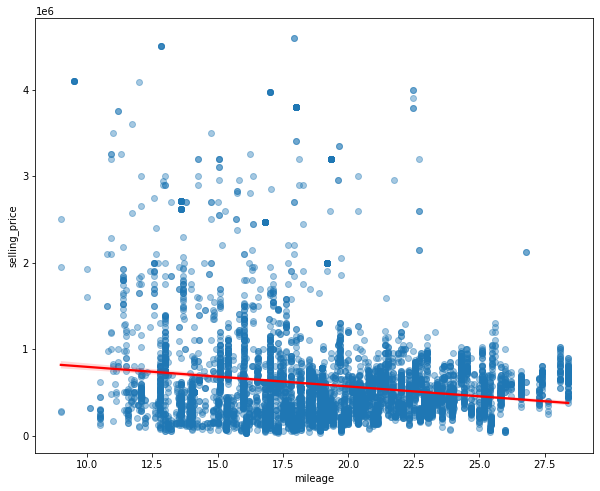

In [256]:
plt.figure(figsize=(10, 8))
sns.regplot(x="mileage", y="selling_price", data=dataset, scatter_kws={"alpha" : 0.4}, line_kws={"color" : "red"})
plt.show()

Higher mileage (km/l) cars seem to be less expensive. I assume this is because cars with a certain fuel type is sought after.

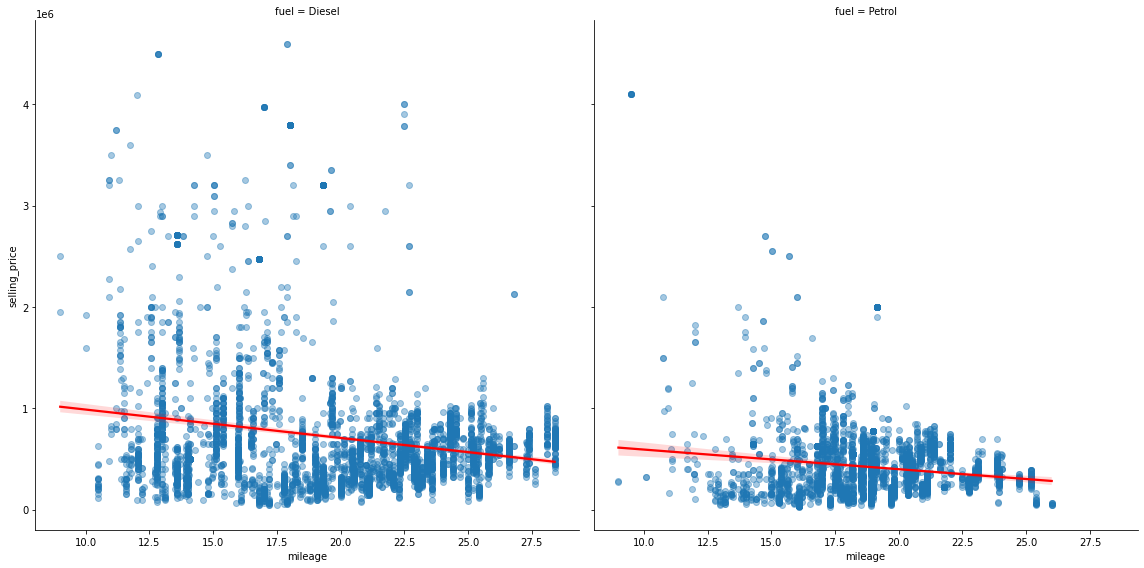

In [260]:
sns.lmplot(x="mileage", y="selling_price", col="fuel", data=dataset, scatter_kws={"alpha" : 0.4}, line_kws={"color" : "red"}, height=8)
plt.show()

My first intuition seems to be wrong. I then assume it is because cars with bigger engines are more expensive, and bigger engines lead to worse mileage.

### Summary of visualization in relation to the selling price

Having gained a lot of information from the visualizations, such as the linear relationship between the features and the selling price. However, some of the features might not all have a linear relationship? I will need to check this. Refer to the model selection notebook under the selling_price directory.

## Visualization in relation of fuel types